In [1]:
#Importing dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
#Importing our file
file = 'cleaned_data.csv'
df = pd.read_csv(file)
df.dropna(inplace=True)

In [3]:
#Cleaning the dataframe
df['Course Short Name']=df['Course Short Name'].str[:1].astype('float64')
df

In [5]:
#Creating a function to test all models we would like to consider
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show() 

In [6]:
# Create, split, and scale data
X = df.drop('Course Flight Hours', axis=1)
y = df['Course Flight Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [10]:
#Testing familiar models to identify the most suitable for our data
test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.37754311326632894
Test Score: 0.393088628486681

Model: KNeighborsRegressor
Train score: 0.8973797887059363
Test Score: 0.8141407807723654

Model: RandomForestRegressor
Train score: 0.9918421999092254
Test Score: 0.9380789518204734

Model: ExtraTreesRegressor
Train score: 0.9996304252378392
Test Score: 0.9329821578894522

Model: AdaBoostRegressor
Train score: 0.9348810088394996
Test Score: 0.9270588238161119

Model: SVR
Train score: 0.3770994547134604
Test Score: 0.3869759059667911



In [11]:
#Selecting the best model from the trials above
model = RandomForestRegressor().fit(X_train_scaled, y_train)

In [12]:
#Printing the scores of our forest model
print(f'Training Score: {model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model.score(X_test_scaled, y_test)}')

Training Score: 0.9918069297706877
Testing Score: 0.9384316227026981


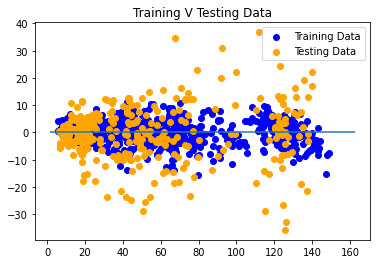

In [22]:
#Plotting residuals
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Training V Testing Data")
plt.savefig('Images/TestingData.png')
plt.show()

In [15]:
# Use our model to predict a value
predicted = model.predict(X_test_scaled)

# Score the prediction with MSE and R2
# mse = mean_squared_error(y_test, predicted)
rms = sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print(f"Root squared error (RMSE): {rms}")
print(f"R-squared (R2): {r2}")

Root squared error (RMSE): 10.150098290767463
R-squared (R2): 0.9384316227026981


In [16]:
stats = df['Course Flight Hours'].describe()
stats

count    1233.000000
mean       54.959611
std        41.091332
min         1.700000
25%        19.600000
50%        43.800000
75%        78.700000
max       162.500000
Name: Course Flight Hours, dtype: float64

In [17]:
#Saving our model
filename = 'pilot_forest_model.sav'
pickle.dump(model, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [18]:
# Load saved model and scaler
filename = 'pilot_forest_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

In [19]:
#Testing for sample user input to get a prediction
raw_user_input = [[7,3,60,2]]

In [20]:
# Scale new user inputs to match pre-processing done on
# train/test data using loaded scaler
scaled_user_input = loaded_scaler.transform(raw_user_input)
scaled_user_input

array([[ 1.43777041, -1.10703137, -0.84953059, -1.50621495]])

In [21]:
# Get predictions using new, scaled user inputs
prediction = loaded_model.predict(scaled_user_input)
prediction

array([16.459])